In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country=pd.read_csv('Country.csv')
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [3]:
league=pd.read_csv('League.csv')
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [4]:
df1=country.merge(league,how='outer',left_on='id',right_on='id')
df1

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


In [5]:
df1.drop([0,5,6,7,8,10],axis=0,inplace=True)

In [6]:
df1

,id,name_x,country_id,name_y
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
9,21518,Spain,21518,Spain LIGA BBVA


In [7]:
matches=pd.read_csv('matches.csv')
matches.sample(6)

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25241,25241,25242,24558,24558,2011/2012,6,2011-08-20 00:00:00,1026955,10243,7955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,1554,1,1,2015/2016,17,2015-11-28 00:00:00,1979953,9987,9991,...,NaN,2.90,3.5,2.38,NaN,NaN,NaN,NaN,NaN,NaN
19684,19684,19685,17642,17642,2015/2016,9,2015-11-01 00:00:00,2015881,10215,8348,...,NaN,2.40,3.0,3.30,NaN,NaN,NaN,NaN,NaN,NaN
3832,3832,3833,1729,1729,2013/2014,28,2014-03-25 00:00:00,1474997,10260,8456,...,2.15,3.40,3.6,2.20,NaN,NaN,NaN,NaN,NaN,NaN
9293,9293,9294,7809,7809,2012/2013,5,2012-09-25 00:00:00,1239476,9823,8721,...,12.00,1.20,7.5,15.00,1.2,6.50,12.0,1.20,6.50,12.0
22443,22443,22444,21518,21518,2010/2011,24,2011-02-20 00:00:00,875933,9865,9783,...,3.60,2.15,3.4,3.60,2.1,3.25,3.4,2.15,3.25,3.3


In [8]:
df2=df1.merge(matches,left_on='id',right_on='country_id')

In [9]:
df2.drop(columns=['country_id_x','Unnamed: 0','id_y','country_id_y','league_id'],inplace=True)

In [10]:
df2.sample()

,id_x,name_x,name_y,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
9811,10257,Italy,Italy Serie A,2011/2012,22,2012-02-05 00:00:00,1083371,8686,8636,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2['name_x'].value_counts()

England    3040
France     3040
Spain      3040
Italy      3017
Germany    2448
Name: name_x, dtype: int64

In [12]:
team=pd.read_csv('team.csv')
team.sample()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
72,9550,8639,65.0,LOSC Lille,LIL


In [13]:
df2=df2.iloc[:,0:11]

In [14]:
df3=df2.merge(team,left_on='home_team_api_id',right_on='team_api_id')
df3.head()

,id_x,name_x,name_y,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,3457,10260,11.0,Manchester United,MUN
1,1729,England,England Premier League,2008/2009,10,2008-10-29 00:00:00,489132,10260,8654,2,0,3457,10260,11.0,Manchester United,MUN
2,1729,England,England Premier League,2008/2009,11,2008-11-01 00:00:00,489142,10260,8667,4,3,3457,10260,11.0,Manchester United,MUN
3,1729,England,England Premier League,2008/2009,13,2008-11-15 00:00:00,489162,10260,10194,5,0,3457,10260,11.0,Manchester United,MUN
4,1729,England,England Premier League,2008/2009,16,2008-12-06 00:00:00,489192,10260,8472,1,0,3457,10260,11.0,Manchester United,MUN


In [15]:
df3['name_x'].value_counts()

England    3040
France     3040
Germany     816
Name: name_x, dtype: int64

In [16]:
df3.rename(columns={'team_long_name':'Home_Team'},inplace=True)

In [17]:
df3=df3.merge(team,left_on='away_team_api_id',right_on='team_api_id')

C:\Users\Atharva Sankhe\AppData\Local\Temp\ipykernel_18580\4269737374.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df3=df3.merge(team,left_on='away_team_api_id',right_on='team_api_id')


In [18]:
df3.shape

(6320, 21)

In [19]:
df3.rename(columns={'team_long_name':'Away_Team'},inplace=True)

In [20]:
df3.sample()

,id_x,name_x,name_y,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id_x,team_api_id_x,team_fifa_api_id_x,Home_Team,team_short_name_x,id_y,team_api_id_y,team_fifa_api_id_y,Away_Team,team_short_name_y
104,1729,England,England Premier League,2011/2012,7,2011-10-01 00:00:00,1024554,8602,10261,1,...,4225,8602,110.0,Wolverhampton Wanderers,WOL,3458,10261,13.0,Newcastle United,NEW


In [21]:
df2['name_x'].value_counts()

England    3040
France     3040
Spain      3040
Italy      3017
Germany    2448
Name: name_x, dtype: int64

In [22]:
group1 = df3.groupby(['name_x','name_y','season','Home_Team'])['home_team_goal'].sum()

In [23]:
group1

name_x   name_y                  season     Home_Team        
England  England Premier League  2008/2009  Arsenal              31
                                            Aston Villa          27
                                            Blackburn Rovers     22
                                            Bolton Wanderers     21
                                            Chelsea              33
                                                                 ..
Germany  Germany 1. Bundesliga   2015/2016  Borussia Dortmund    10
                                            FC Bayern Munich     19
                                            FC Schalke 04        11
                                            Hamburger SV          5
                                            Hannover 96           3
Name: home_team_goal, Length: 368, dtype: int64

In [24]:
group11= df3.groupby(['name_x','name_y','season','Away_Team'])['away_team_goal'].sum()
group11

name_x   name_y                  season     Away_Team        
England  England Premier League  2008/2009  Arsenal              37
                                            Aston Villa          27
                                            Blackburn Rovers     18
                                            Bolton Wanderers     20
                                            Chelsea              35
                                                                 ..
Germany  Germany 1. Bundesliga   2015/2016  Borussia Dortmund     9
                                            FC Bayern Munich      6
                                            FC Schalke 04         7
                                            Hamburger SV          5
                                            Hannover 96           4
Name: away_team_goal, Length: 368, dtype: int64

In [25]:
group2 = df3.groupby(['name_x','name_y','season','Home_Team'])['away_team_goal'].sum()
group2

name_x   name_y                  season     Home_Team        
England  England Premier League  2008/2009  Arsenal              16
                                            Aston Villa          21
                                            Blackburn Rovers     23
                                            Bolton Wanderers     21
                                            Chelsea              12
                                                                 ..
Germany  Germany 1. Bundesliga   2015/2016  Borussia Dortmund     2
                                            FC Bayern Munich      2
                                            FC Schalke 04        11
                                            Hamburger SV          6
                                            Hannover 96          12
Name: away_team_goal, Length: 368, dtype: int64

In [26]:
group22 = df3.groupby(['name_x','name_y','season','Away_Team'])['home_team_goal'].sum()
group22

name_x   name_y                  season     Away_Team        
England  England Premier League  2008/2009  Arsenal              21
                                            Aston Villa          27
                                            Blackburn Rovers     37
                                            Bolton Wanderers     32
                                            Chelsea              12
                                                                 ..
Germany  Germany 1. Bundesliga   2015/2016  Borussia Dortmund    12
                                            FC Bayern Munich      2
                                            FC Schalke 04         8
                                            Hamburger SV         12
                                            Hannover 96          11
Name: home_team_goal, Length: 368, dtype: int64

In [27]:
l1=group11.tolist()
l1

[37,
 27,
 18,
 20,
 35,
 24,
 11,
 21,
 36,
 18,
 25,
 11,
 16,
 12,
 16,
 13,
 24,
 10,
 19,
 17,
 35,
 23,
 19,
 13,
 16,
 17,
 35,
 25,
 12,
 12,
 18,
 32,
 34,
 10,
 10,
 16,
 27,
 17,
 18,
 19,
 39,
 22,
 18,
 24,
 25,
 18,
 30,
 20,
 19,
 22,
 26,
 29,
 15,
 15,
 20,
 25,
 26,
 19,
 18,
 16,
 35,
 17,
 22,
 23,
 24,
 22,
 12,
 23,
 38,
 37,
 27,
 24,
 19,
 11,
 19,
 17,
 27,
 24,
 20,
 21,
 25,
 24,
 34,
 22,
 22,
 38,
 25,
 41,
 21,
 16,
 17,
 20,
 23,
 13,
 21,
 19,
 37,
 21,
 11,
 21,
 32,
 17,
 12,
 28,
 15,
 23,
 16,
 18,
 48,
 39,
 35,
 20,
 11,
 22,
 18,
 20,
 21,
 25,
 19,
 15,
 30,
 13,
 14,
 37,
 26,
 21,
 14,
 18,
 22,
 39,
 21,
 14,
 19,
 17,
 16,
 15,
 19,
 27,
 14,
 19,
 34,
 13,
 22,
 27,
 20,
 24,
 33,
 30,
 24,
 22,
 12,
 13,
 20,
 19,
 25,
 22,
 34,
 20,
 14,
 31,
 17,
 15,
 19,
 15,
 26,
 12,
 16,
 28,
 15,
 17,
 13,
 25,
 18,
 20,
 32,
 20,
 20,
 14,
 19,
 8,
 18,
 13,
 26,
 14,
 18,
 10,
 24,
 7,
 28,
 14,
 26,
 18,
 32,
 32,
 18,
 13,
 21,
 17,
 12,
 27,
 7

In [28]:
l2=group2.tolist()
l2

[16,
 21,
 23,
 21,
 12,
 20,
 16,
 36,
 13,
 18,
 13,
 20,
 29,
 29,
 15,
 25,
 10,
 33,
 22,
 18,
 15,
 16,
 13,
 18,
 31,
 30,
 14,
 21,
 15,
 29,
 15,
 20,
 12,
 32,
 21,
 19,
 12,
 29,
 24,
 22,
 15,
 19,
 22,
 16,
 37,
 24,
 13,
 23,
 23,
 14,
 12,
 12,
 27,
 18,
 27,
 19,
 30,
 31,
 34,
 30,
 17,
 25,
 33,
 39,
 24,
 15,
 26,
 16,
 12,
 19,
 17,
 30,
 25,
 20,
 17,
 18,
 17,
 22,
 27,
 43,
 23,
 28,
 16,
 17,
 30,
 16,
 15,
 19,
 31,
 20,
 28,
 33,
 24,
 22,
 19,
 26,
 18,
 25,
 22,
 39,
 11,
 29,
 35,
 11,
 23,
 19,
 38,
 21,
 18,
 13,
 21,
 28,
 18,
 23,
 17,
 27,
 26,
 23,
 27,
 26,
 14,
 25,
 21,
 9,
 27,
 21,
 24,
 22,
 20,
 14,
 15,
 27,
 24,
 13,
 22,
 27,
 22,
 24,
 26,
 18,
 11,
 35,
 34,
 30,
 23,
 30,
 18,
 22,
 21,
 9,
 24,
 30,
 22,
 24,
 20,
 20,
 15,
 19,
 26,
 26,
 12,
 23,
 19,
 23,
 20,
 25,
 17,
 12,
 13,
 20,
 34,
 21,
 19,
 15,
 22,
 17,
 17,
 14,
 8,
 18,
 14,
 14,
 26,
 16,
 19,
 29,
 13,
 28,
 15,
 25,
 12,
 23,
 17,
 14,
 20,
 17,
 18,
 16,
 31,
 21,
 31

In [29]:
l22=group22.tolist()
l22

[21,
 27,
 37,
 32,
 12,
 17,
 18,
 28,
 14,
 32,
 11,
 37,
 30,
 28,
 40,
 29,
 35,
 34,
 23,
 27,
 26,
 23,
 34,
 37,
 36,
 52,
 18,
 28,
 31,
 46,
 20,
 25,
 16,
 34,
 27,
 37,
 29,
 37,
 55,
 34,
 28,
 40,
 36,
 43,
 41,
 32,
 20,
 22,
 20,
 30,
 21,
 25,
 30,
 30,
 29,
 27,
 41,
 39,
 27,
 36,
 32,
 28,
 45,
 38,
 22,
 25,
 25,
 24,
 17,
 14,
 34,
 36,
 41,
 33,
 29,
 33,
 24,
 30,
 35,
 39,
 14,
 41,
 23,
 23,
 30,
 27,
 19,
 24,
 37,
 38,
 32,
 40,
 36,
 23,
 35,
 25,
 28,
 32,
 31,
 34,
 30,
 32,
 39,
 16,
 25,
 20,
 47,
 32,
 32,
 24,
 22,
 31,
 44,
 23,
 35,
 33,
 28,
 28,
 32,
 25,
 22,
 32,
 32,
 23,
 24,
 29,
 27,
 33,
 28,
 24,
 22,
 36,
 49,
 20,
 23,
 26,
 27,
 29,
 25,
 29,
 25,
 41,
 33,
 23,
 28,
 25,
 18,
 28,
 20,
 26,
 41,
 37,
 19,
 31,
 42,
 32,
 20,
 31,
 22,
 25,
 23,
 22,
 28,
 33,
 27,
 29,
 31,
 22,
 24,
 19,
 33,
 33,
 22,
 14,
 13,
 21,
 32,
 20,
 19,
 24,
 15,
 31,
 27,
 29,
 23,
 23,
 27,
 33,
 25,
 34,
 28,
 34,
 21,
 22,
 26,
 27,
 23,
 20,
 31,
 29,


In [30]:
data = pd.DataFrame(group1)
data['away_team_goal']=l1
data['home_team_concede']=l2
data['away_team_concede']=l22

In [31]:
data['Goals_Scored']=data['home_team_goal']+data['away_team_goal']
data['Goals_Conceded']=data['home_team_concede']+data['away_team_concede']
data

home_team_goal  \
name_x  name_y                 season    Home_Team                           
England England Premier League 2008/2009 Arsenal                        31   
                                         Aston Villa                    27   
                                         Blackburn Rovers               22   
                                         Bolton Wanderers               21   
                                         Chelsea                        33   
...                                                                    ...   
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund              10   
                                         FC Bayern Munich               19   
                                         FC Schalke 04                  11   
                                         Hamburger SV                    5   
                                         Hannover 96                     3   

                                                            away_team_goal  \
name_x  name_y                 season    Home_Team                           
England England Premier League 2008/2009 Arsenal                        37   
                                         Aston Villa                    27   
                                         Blackburn Rovers               18   
                                         Bolton Wanderers               20   
                                         Chelsea                        35   
...                                                                    ...   
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund               9   
                                         FC Bayern Munich                6   
                                         FC Schalke 04                   7   
                                         Hamburger SV                    5   
                                         Hannover 96                     4   

                                                            home_team_concede  \
name_x  name_y                 season    Home_Team                              
England England Premier League 2008/2009 Arsenal                           16   
                                         Aston Villa                       21   
                                         Blackburn Rovers                  23   
                                         Bolton Wanderers                  21   
                                         Chelsea                           12   
...                                                                       ...   
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund                  2   
                                         FC Bayern Munich                   2   
                                         FC Schalke 04                     11   
                                         Hamburger SV                       6   
                                         Hannover 96                       12   

                                                            away_team_concede  \
name_x  name_y                 season    Home_Team                              
England England Premier League 2008/2009 Arsenal                           21   
                                         Aston Villa                       27   
                                         Blackburn Rovers                  37   
                                         Bolton Wanderers                  32   
                                         Chelsea                           12   
...                                                                       ...   
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund                 12   
                                         FC Bayern Munich                   2   
                                         FC Schalke 04                      8   
                                         Hamburger SV                      12   
    

In [32]:
data.drop(columns={'home_team_goal','away_team_goal','home_team_concede','away_team_concede'},inplace=True)

In [33]:
data

Goals_Scored  \
name_x  name_y                 season    Home_Team                         
England England Premier League 2008/2009 Arsenal                      68   
                                         Aston Villa                  54   
                                         Blackburn Rovers             40   
                                         Bolton Wanderers             41   
                                         Chelsea                      68   
...                                                                  ...   
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund            19   
                                         FC Bayern Munich             25   
                                         FC Schalke 04                18   
                                         Hamburger SV                 10   
                                         Hannover 96                   7   

                                                            Goals_Conceded  
name_x  name_y                 season    Home_Team                          
England England Premier League 2008/2009 Arsenal                        37  
                                         Aston Villa                    48  
                                         Blackburn Rovers               60  
                                         Bolton Wanderers               53  
                                         Chelsea                        24  
...                                                                    ...  
Germany Germany 1. Bundesliga  2015/2016 Borussia Dortmund              14  
                                         FC Bayern Munich                4  
                                         FC Schalke 04                  19  
                                         Hamburger SV                   18  
                                         Hannover 96                    23  

[368 rows x 2 columns]

In [34]:
data=data.reset_index()

In [35]:
data

,name_x,name_y,season,Home_Team,Goals_Scored,Goals_Conceded
0,England,England Premier League,2008/2009,Arsenal,68,37
1,England,England Premier League,2008/2009,Aston Villa,54,48
2,England,England Premier League,2008/2009,Blackburn Rovers,40,60
3,England,England Premier League,2008/2009,Bolton Wanderers,41,53
4,England,England Premier League,2008/2009,Chelsea,68,24
...,...,...,...,...,...,...
363,Germany,Germany 1. Bundesliga,2015/2016,Borussia Dortmund,19,14
364,Germany,Germany 1. Bundesliga,2015/2016,FC Bayern Munich,25,4
365,Germany,Germany 1. Bundesliga,2015/2016,FC Schalke 04,18,19
366,Germany,Germany 1. Bundesliga,2015/2016,Hamburger SV,10,18


In [36]:
data.to_csv('foot.csv')

In [37]:
data['name_x'].value_counts()

England    160
France     160
Germany     48
Name: name_x, dtype: int64

In [38]:
country_goals=data.groupby(['name_x'])['Goals_Scored'].mean()
country_goals

name_x
England    51.500000
France     46.418750
Germany    14.979167
Name: Goals_Scored, dtype: float64

In [39]:
df2['name_x'].value_counts()

England    3040
France     3040
Spain      3040
Italy      3017
Germany    2448
Name: name_x, dtype: int64

In [40]:
df2

,id_x,name_x,name_y,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1
1,1729,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0
2,1729,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1
3,1729,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1
4,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2
...,...,...,...,...,...,...,...,...,...,...,...
14580,21518,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,1
14581,21518,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,0
14582,21518,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,0
14583,21518,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,1


In [41]:
ngroup1 = df2.groupby(['name_x','name_y','season','home_team_api_id'])['home_team_goal'].sum()
ngroup1.count()

784

In [42]:
ngroup11= df2.groupby(['name_x','name_y','season','away_team_api_id'])['away_team_goal'].sum()
ngroup11.count()

784

In [43]:
ngroup2 = df2.groupby(['name_x','name_y','season','home_team_api_id'])['away_team_goal'].sum()
ngroup2.count()

784

In [44]:
ngroup22 = df2.groupby(['name_x','name_y','season','away_team_api_id'])['home_team_goal'].sum()
ngroup22.count()

784

In [45]:
nl1=ngroup11.tolist()

In [46]:
nl2=ngroup2.tolist()

In [47]:
nl22=ngroup22.tolist()

In [48]:
ndata = pd.DataFrame(ngroup1)
ndata['away_team_goal']=nl1
ndata['home_team_concede']=nl2
ndata['away_team_concede']=nl22
ndata

home_team_goal  \
name_x  name_y                 season    home_team_api_id                   
England England Premier League 2008/2009 8455                          33   
                                         8456                          40   
                                         8462                          26   
                                         8472                          21   
                                         8528                          17   
...                                                                   ...   
Spain   Spain LIGA BBVA        2015/2016 9869                          28   
                                         9906                          33   
                                         9910                          29   
                                         10205                         26   
                                         10267                         25   

                                                           away_team_goal  \
name_x  name_y                 season    home_team_api_id                   
England England Premier League 2008/2009 8455                          35   
                                         8456                          18   
                                         8462                          12   
                                         8472                          13   
                                         8528                          17   
...                                                                   ...   
Spain   Spain LIGA BBVA        2015/2016 9869                          12   
                                         9906                          30   
                                         9910                          22   
                                         10205                         18   
                                         10267                         21   

                                                           home_team_concede  \
name_x  name_y                 season    home_team_api_id                      
England England Premier League 2008/2009 8455                             12   
                                         8456                             18   
                                         8462                             29   
                                         8472                             25   
                                         8528                             18   
...                                                                      ...   
Spain   Spain LIGA BBVA        2015/2016 9869                             28   
                                         9906                              7   
                                         9910                             25   
                                         10205                            12   
                                         10267                            23   

                                                           away_team_concede  
name_x  name_y                 season    home_team_api_id                     
England England Premier League 2008/2009 8455                             12  
                                         8456                             32  
                                         8462                             28  
                                         8472                             29  
                                         8528                             27  
...                                                                      ...  
Spain   Spain LIGA BBVA        2015/2016 9869                             34  
                                         9906                             11  
                                         9910                             34  
                                         10205                            23  
                                         10267                    

In [49]:
ndata['Goals_Scored']=ndata['home_team_goal']+ndata['away_team_goal']
ndata['Goals_Conceded']=ndata['home_team_concede']+ndata['away_team_concede']
ndata

home_team_goal  \
name_x  name_y                 season    home_team_api_id                   
England England Premier League 2008/2009 8455                          33   
                                         8456                          40   
                                         8462                          26   
                                         8472                          21   
                                         8528                          17   
...                                                                   ...   
Spain   Spain LIGA BBVA        2015/2016 9869                          28   
                                         9906                          33   
                                         9910                          29   
                                         10205                         26   
                                         10267                         25   

                                                           away_team_goal  \
name_x  name_y                 season    home_team_api_id                   
England England Premier League 2008/2009 8455                          35   
                                         8456                          18   
                                         8462                          12   
                                         8472                          13   
                                         8528                          17   
...                                                                   ...   
Spain   Spain LIGA BBVA        2015/2016 9869                          12   
                                         9906                          30   
                                         9910                          22   
                                         10205                         18   
                                         10267                         21   

                                                           home_team_concede  \
name_x  name_y                 season    home_team_api_id                      
England England Premier League 2008/2009 8455                             12   
                                         8456                             18   
                                         8462                             29   
                                         8472                             25   
                                         8528                             18   
...                                                                      ...   
Spain   Spain LIGA BBVA        2015/2016 9869                             28   
                                         9906                              7   
                                         9910                             25   
                                         10205                            12   
                                         10267                            23   

                                                           away_team_concede  \
name_x  name_y                 season    home_team_api_id                      
England England Premier League 2008/2009 8455                             12   
                                         8456                             32   
                                         8462                             28   
                                         8472                             29   
                                         8528                             27   
...                                                                      ...   
Spain   Spain LIGA BBVA        2015/2016 9869                             34   
                                         9906                             11   
                                         9910                             34   
                                         10205                            23   
                                         10267        

In [50]:
ndata.drop(columns={'home_team_goal','away_team_goal','home_team_concede','away_team_concede'},inplace=True)

In [51]:
ndata=ndata.reset_index()

In [52]:
ndata

,name_x,name_y,season,home_team_api_id,Goals_Scored,Goals_Conceded
0,England,England Premier League,2008/2009,8455,68,24
1,England,England Premier League,2008/2009,8456,58,50
2,England,England Premier League,2008/2009,8462,38,57
3,England,England Premier League,2008/2009,8472,34,54
4,England,England Premier League,2008/2009,8528,34,45
...,...,...,...,...,...,...
779,Spain,Spain LIGA BBVA,2015/2016,9869,40,62
780,Spain,Spain LIGA BBVA,2015/2016,9906,63,18
781,Spain,Spain LIGA BBVA,2015/2016,9910,51,59
782,Spain,Spain LIGA BBVA,2015/2016,10205,44,35


In [53]:
ndata.rename(columns={'name_x':'Country','name_y':'League','home_team_api_id':'Team_id'},inplace=True)


In [54]:
# ndata.drop(columns=['index'],inplace=True)

In [55]:
ndata

,Country,League,season,Team_id,Goals_Scored,Goals_Conceded
0,England,England Premier League,2008/2009,8455,68,24
1,England,England Premier League,2008/2009,8456,58,50
2,England,England Premier League,2008/2009,8462,38,57
3,England,England Premier League,2008/2009,8472,34,54
4,England,England Premier League,2008/2009,8528,34,45
...,...,...,...,...,...,...
779,Spain,Spain LIGA BBVA,2015/2016,9869,40,62
780,Spain,Spain LIGA BBVA,2015/2016,9906,63,18
781,Spain,Spain LIGA BBVA,2015/2016,9910,51,59
782,Spain,Spain LIGA BBVA,2015/2016,10205,44,35


In [56]:
ndata['League'].value_counts()

England Premier League    160
France Ligue 1            160
Italy Serie A             160
Spain LIGA BBVA           160
Germany 1. Bundesliga     144
Name: League, dtype: int64

In [57]:
goals=ndata.groupby(['Country','season'])['Goals_Scored'].mean()
goaldf=pd.DataFrame(goals)
goaldf=goaldf.reset_index()

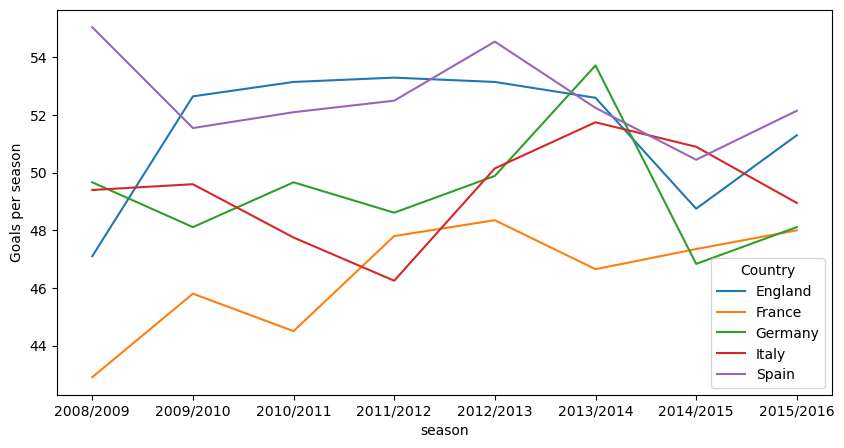

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(x=goaldf['season'],y=goaldf['Goals_Scored'],hue=goaldf['Country'])
plt.ylabel('Goals per season')
plt.show()

In [59]:
bu=pd.read_csv('Team_Attributes.csv',usecols=['buildUpPlaySpeedClass','buildUpPlayPassingClass'])

In [60]:
bu['add']=bu['buildUpPlaySpeedClass']+bu['buildUpPlayPassingClass']

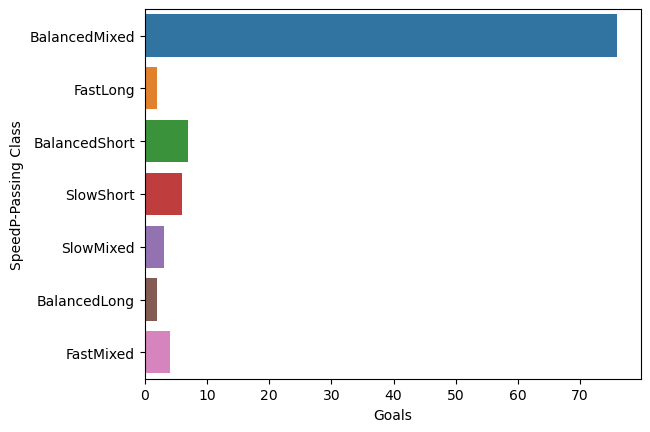

In [61]:
sns.countplot(y=bu['add'],orient="v")
plt.ylabel('SpeedP-Passing Class')
plt.xlabel('Goals')
plt.show()

In [64]:
player=pd.read_csv('Player_Attributes.csv')
player.sample()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
97,98,17725,23780,2013-04-26 00:00:00,74,74,right,medium,medium,45,...,40,44,81,75,76,7,5,15,11,10


<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

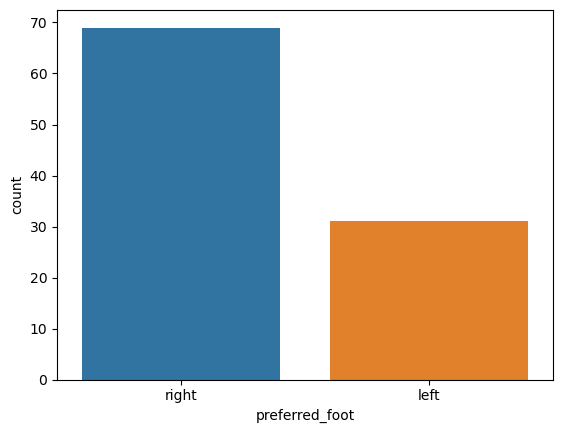

In [65]:
sns.countplot(x=player['preferred_foot'])

In [85]:
#top rated players
top=player.sort_values(by=['overall_rating'],ascending=False).drop_duplicates('player_api_id').head(10)
top

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
83,84,140161,30572,2009-02-22 00:00:00,75,82,right,medium,high,60,...,54,60,80,78,70,14,11,65,11,10
99,100,17725,23780,2013-03-08 00:00:00,74,74,right,medium,medium,45,...,40,44,81,75,76,7,5,15,11,10
11,12,189615,155782,2015-09-25 00:00:00,74,78,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12
47,48,186170,162549,2013-09-20 00:00:00,71,78,right,medium,medium,73,...,72,63,22,21,21,15,10,11,8,12
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8


Text(0.5, 0, 'increasing time ->')

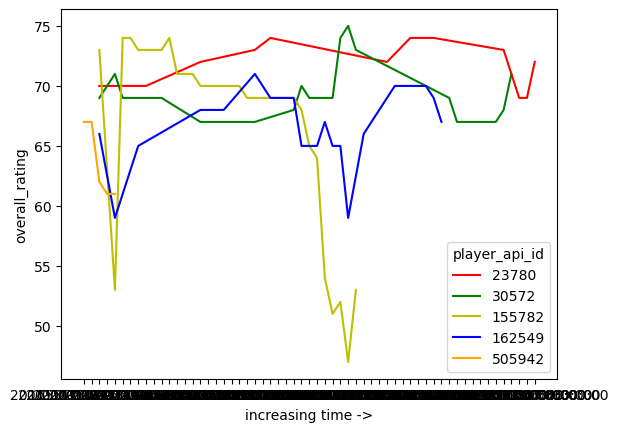

In [96]:
sns.lineplot(x=player['date'],y=player['overall_rating'],hue=player['player_api_id'],palette=['r', 'g','y','b','orange'])
plt.xlabel('increasing time ->')

Text(0.5, 0, 'increasing time ->')

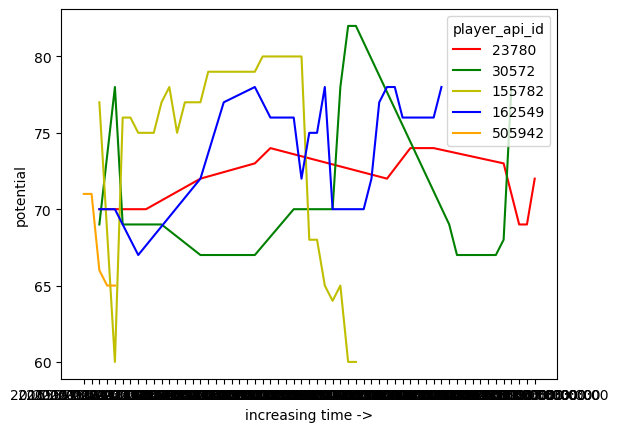

In [97]:
sns.lineplot(x=player['date'],y=player['potential'],hue=player['player_api_id'],palette=['r', 'g','y','b','orange'])
plt.xlabel('increasing time ->')

<AxesSubplot:xlabel='player_api_id', ylabel='dribbling'>

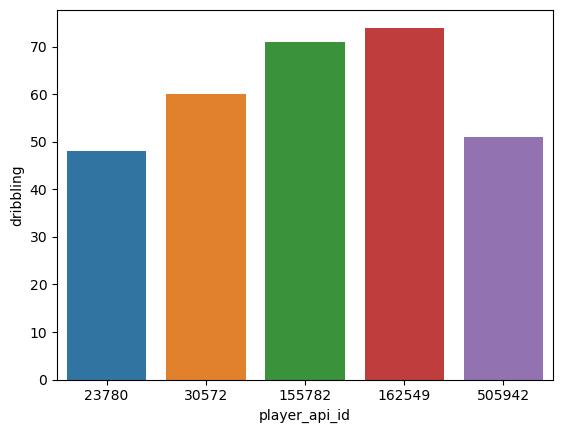

In [98]:
sns.barplot(x=top['player_api_id'],y=top['dribbling'])

<AxesSubplot:xlabel='player_api_id', ylabel='finishing'>

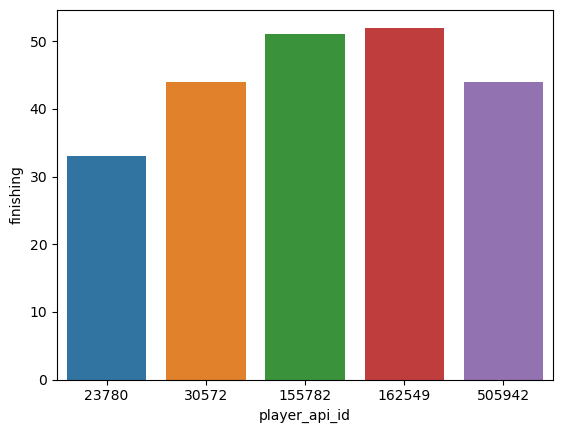

In [86]:
sns.barplot(x=top['player_api_id'],y=top['finishing'])

<AxesSubplot:xlabel='player_api_id', ylabel='marking'>

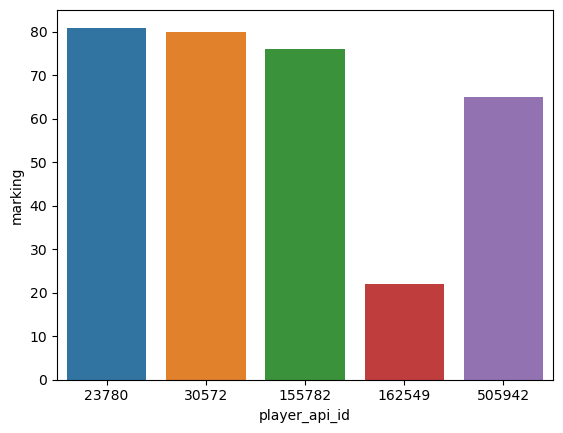

In [99]:
sns.barplot(x=top['player_api_id'],y=top['marking'])